<a href="https://colab.research.google.com/github/justdelly/My-IE423-Tasks/blob/main/notebooks/hackhaton_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

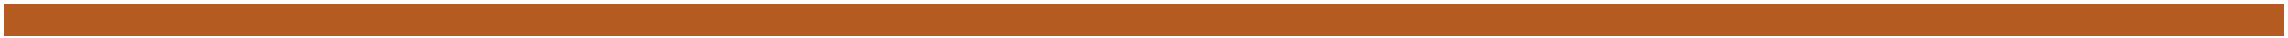

## <font color='#475468'> House Prices:</font>
### <font color='#475468'> Can you predict the rent prices?</font>

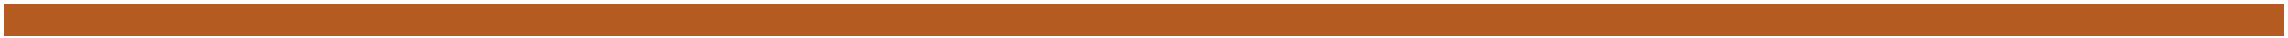

## Initialize

In [1]:
import pandas as pd
import numpy as np

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Load Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dfMlb = pd.read_csv('/content/drive/MyDrive/Datasets/antalya_kiralik_ev.csv')


In [4]:
# Find the index of the row containing 'Doğalgaz Sobası' in the relevant column
index_to_drop = dfMlb[dfMlb['isitma_turu'] == 'Doğalgaz Sobası'].index

# Drop the row from X_test
dfMlb = dfMlb.drop(index_to_drop)

# Now you can proceed with label encoding on the modified X_test_dropped
# ... (rest of your label encoding code)

In [5]:
dfMlb.head()

,Unnamed: 0,mahalle,fiyat,brut_alan_m2,net_alan_m2,oda_sayisi,bina_yas,dairenin_bulundugu_kat,bina_kat_sayisi,isitma_turu,banyo_sayisi,balkon,asansor,otopark,esya_durumu,site_icinde,aidat,depozito,sahibi
0,1,Bayındır Mh.,15000.0,90.0,80.0,2+1,21-25 arası,Giriş Katı,4.0,Klima,1.0,0,0,Açık Otopark,1,0,100,15000,0
1,2,Çaybaşı Mh.,29000.0,145.0,135.0,3+1,0,1,5.0,Kombi (Doğalgaz),1.0,1,1,Kapalı Otopark,0,1,1500,30000,0
2,3,Güzeloba Mh.,24750.0,145.0,130.0,3+1,11-15 arası,3,4.0,Klima,1.0,1,0,Açık Otopark,0,0,500,25000,1
4,5,Çağlayan Mh.,37500.0,320.0,300.0,4+2,16-20 arası,8,8.0,Klima,3.0,1,1,Açık Otopark,0,1,0,37500,0
5,6,Kızılsaray Mh.,25000.0,140.0,130.0,3+1,26-30 arası,Giriş Altı Kot 2,10.0,Klima,1.0,1,1,Yok,1,0,0,50000,1


In [6]:
dfMlb.describe()

,Unnamed: 0,fiyat,brut_alan_m2,net_alan_m2,bina_kat_sayisi,banyo_sayisi,balkon,asansor,esya_durumu,site_icinde,aidat,depozito,sahibi
count,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000
mean,412.236315,24252.453939,123.612817,111.387183,5.206943,1.279039,0.918558,0.627503,0.481976,0.281709,419.941255,21944.392523,0.088117
std,238.011996,16690.117519,53.157567,48.441565,2.960733,0.520542,0.273695,0.483793,0.500009,0.450133,2646.312775,24429.366600,0.283655
min,1.000000,10250.000000,25.000000,20.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,209.000000,15000.000000,85.000000,75.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,500.000000,0.000000
50%,415.000000,20000.000000,115.000000,100.000000,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,50.000000,18000.000000,0.000000
75%,618.000000,27000.000000,150.000000,140.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,300.000000,27000.000000,0.000000
max,828.000000,200000.000000,400.000000,370.000000,17.000000,4.000000,1.000000,1.000000,1.000000,1.000000,70000.000000,200000.000000,1.000000


# Exploratory Data Analysis

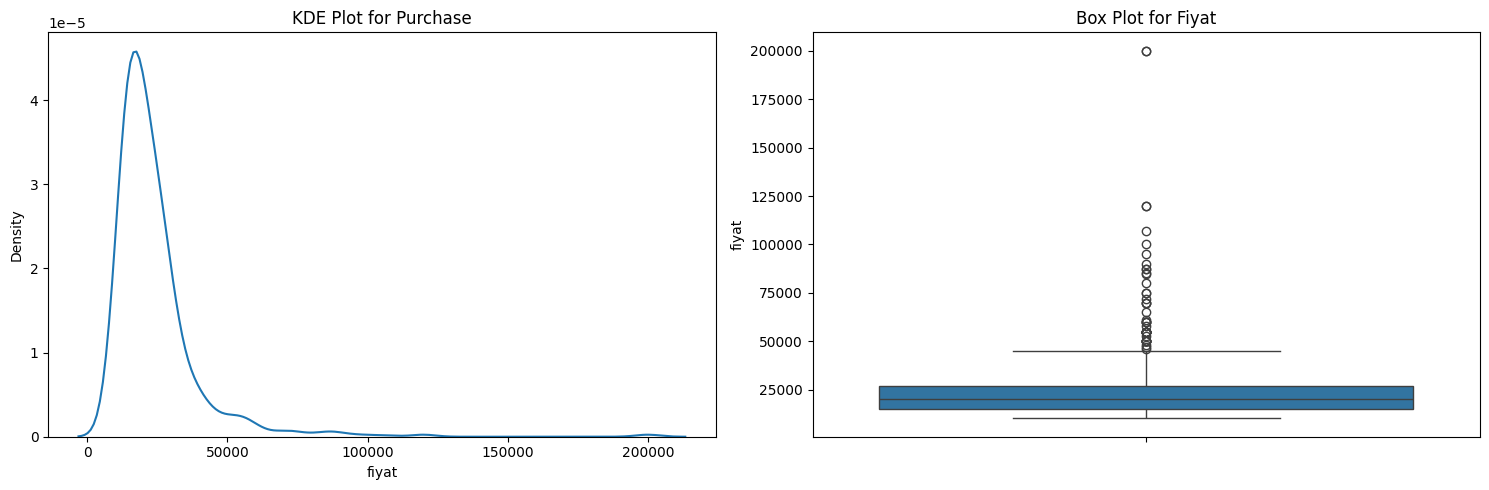

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))

plt.subplot(121)  # Subplot 1: KDE plot
sns.kdeplot(data=dfMlb['fiyat'])
plt.title('KDE Plot for Purchase')

plt.subplot(122)  # Subplot 2: Box plot
sns.boxplot(data=dfMlb['fiyat'])
plt.title('Box Plot for Fiyat')

plt.tight_layout()  # Automatically adjust subplot parameters for better layout
plt.show()

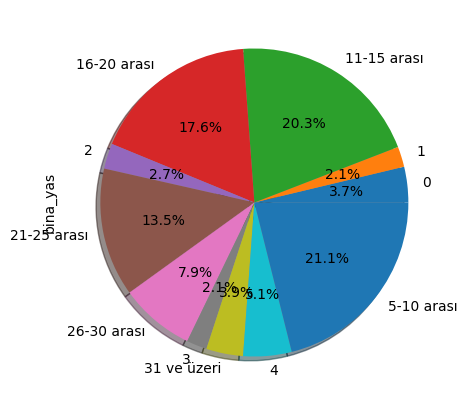

In [9]:
dfMlb.groupby('bina_yas').agg({'bina_yas':'count'}).bina_yas.plot(kind='pie',autopct='%1.1f%%',figsize=(5,5),shadow=True)
plt.show()

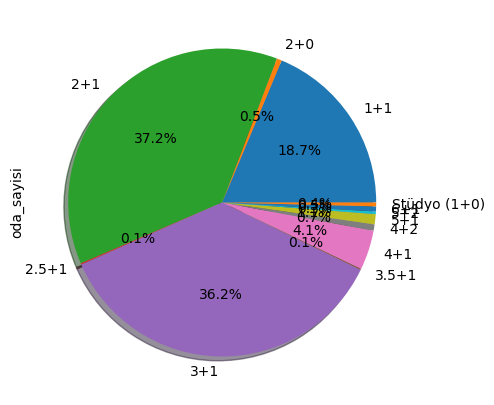

In [10]:
dfMlb.groupby('oda_sayisi').agg({'oda_sayisi':'count'}).oda_sayisi.plot(kind='pie',autopct='%1.1f%%',figsize=(5,5),shadow=True)
plt.show()

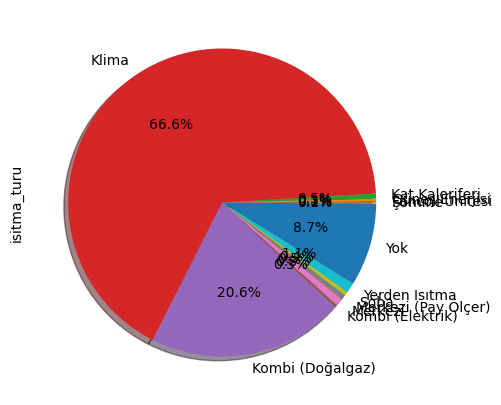

In [11]:
dfMlb.groupby('isitma_turu').agg({'isitma_turu':'count'}).isitma_turu.plot(kind='pie',autopct='%1.1f%%',figsize=(5,5),shadow=True)
plt.show()

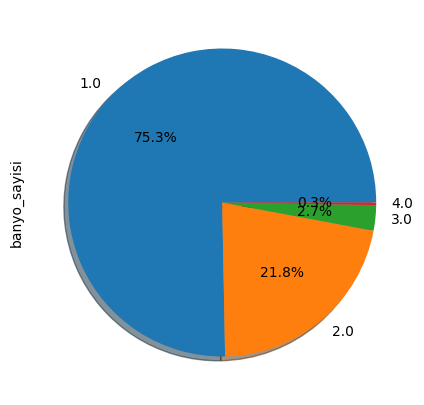

In [12]:
dfMlb.groupby('banyo_sayisi').agg({'banyo_sayisi':'count'}).banyo_sayisi.plot(kind='pie',autopct='%1.1f%%',figsize=(5,5),shadow=True)
plt.show()

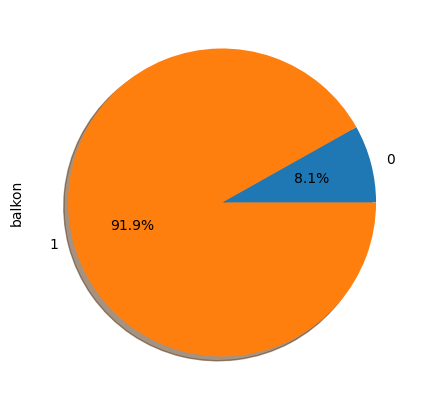

In [13]:
dfMlb.groupby('balkon').agg({'balkon':'count'}).balkon.plot(kind='pie',autopct='%1.1f%%',figsize=(5,5),shadow=True)
plt.show()

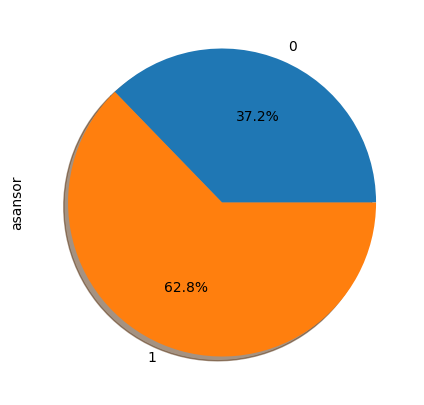

In [14]:
dfMlb.groupby('asansor').agg({'asansor':'count'}).asansor.plot(kind='pie',autopct='%1.1f%%',figsize=(5,5),shadow=True)
plt.show()

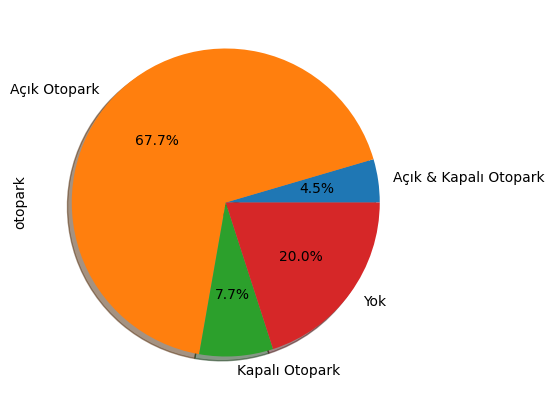

In [15]:
dfMlb.groupby('otopark').agg({'otopark':'count'}).otopark.plot(kind='pie',autopct='%1.1f%%',figsize=(5,5),shadow=True)
plt.show()

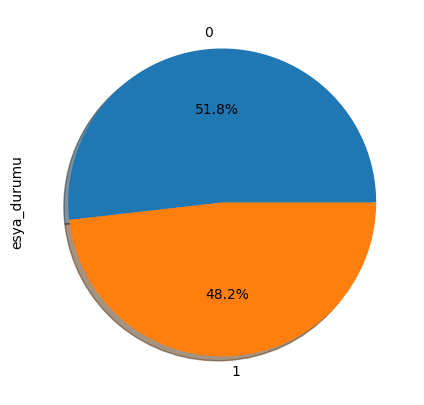

In [16]:
dfMlb.groupby('esya_durumu').agg({'esya_durumu':'count'}).esya_durumu.plot(kind='pie',autopct='%1.1f%%',figsize=(5,5),shadow=True)
plt.show()

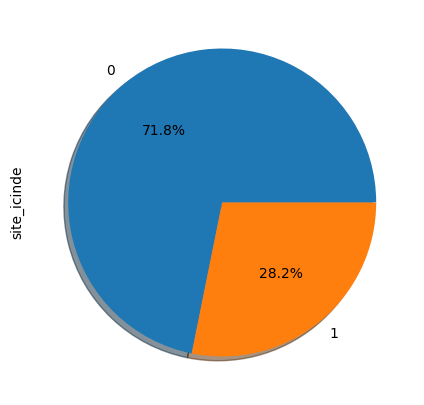

In [17]:
dfMlb.groupby('site_icinde').agg({'site_icinde':'count'}).site_icinde.plot(kind='pie',autopct='%1.1f%%',figsize=(5,5),shadow=True)
plt.show()

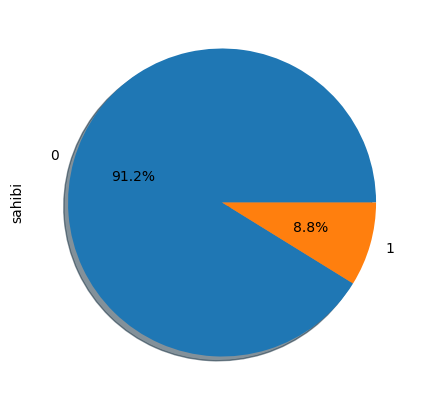

In [18]:
dfMlb.groupby('sahibi').agg({'sahibi':'count'}).sahibi.plot(kind='pie',autopct='%1.1f%%',figsize=(5,5),shadow=True)
plt.show()

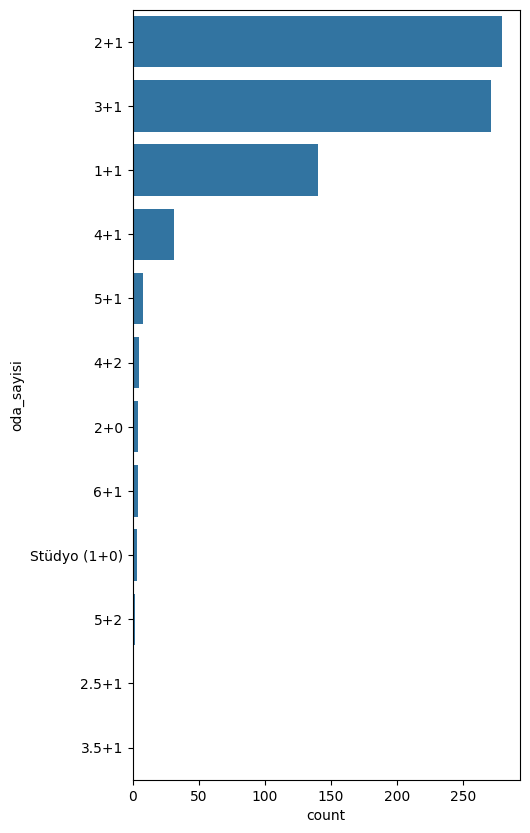

In [19]:
p_id=dfMlb.value_counts('oda_sayisi').sort_values(ascending=False).head(50)
plt.figure(figsize=(5,10))
sns.barplot(y=p_id.index,x=p_id)
plt.show()

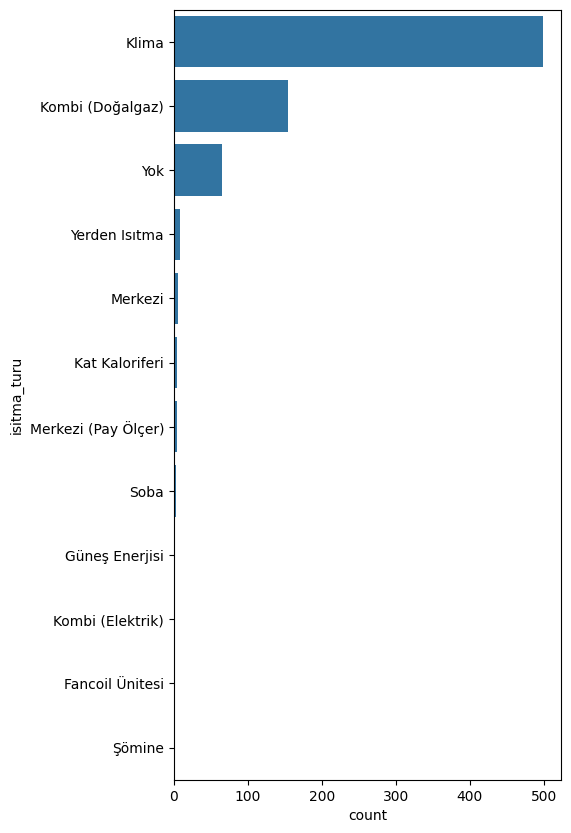

In [20]:
p_id=dfMlb.value_counts('isitma_turu').sort_values(ascending=False).head(50)
plt.figure(figsize=(5,10))
sns.barplot(y=p_id.index,x=p_id)
plt.show()

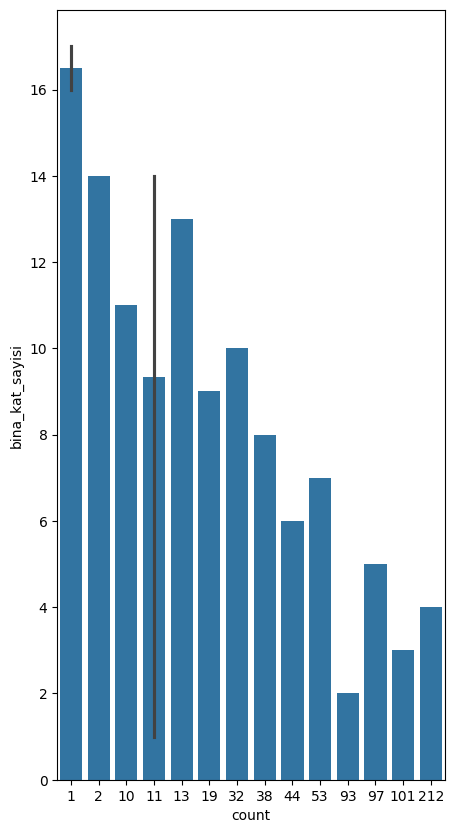

In [21]:
p_id=dfMlb.value_counts('bina_kat_sayisi').sort_values(ascending=False).head(50)
plt.figure(figsize=(5,10))
sns.barplot(y=p_id.index,x=p_id)
plt.show()

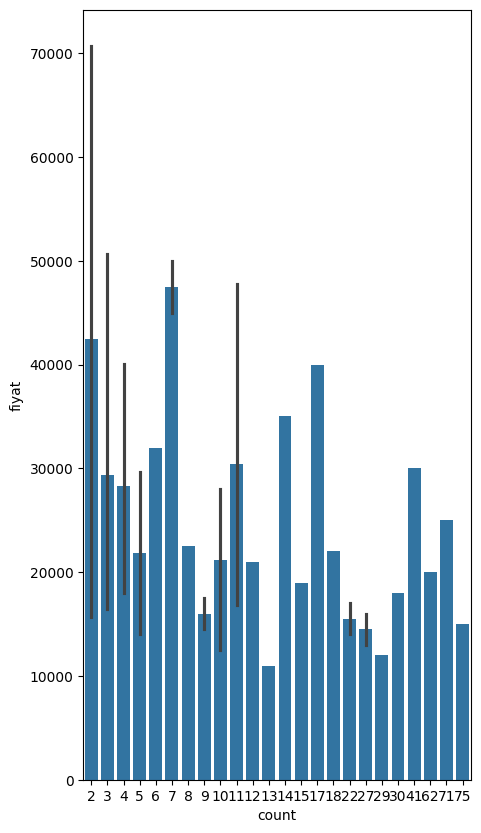

In [22]:
p_id=dfMlb.value_counts('fiyat').sort_values(ascending=False).head(50)
plt.figure(figsize=(5,10))
sns.barplot(y=p_id.index,x=p_id)
plt.show()

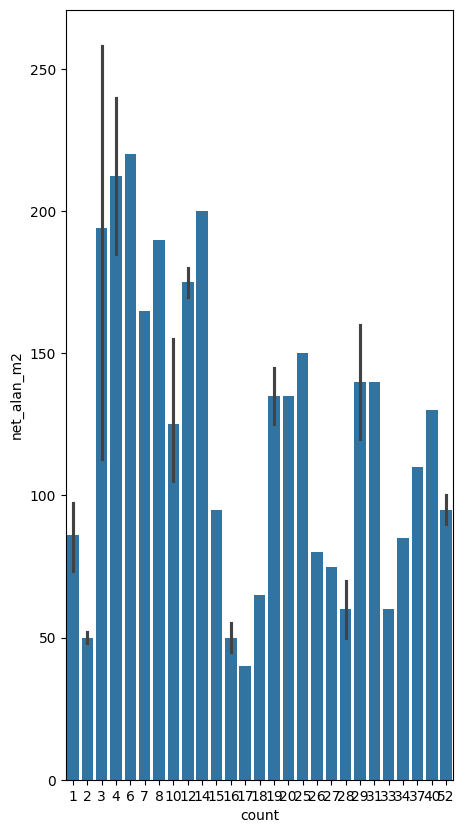

In [23]:
p_id=dfMlb.value_counts('net_alan_m2').sort_values(ascending=False).head(50)
plt.figure(figsize=(5,10))
sns.barplot(y=p_id.index,x=p_id)
plt.show()

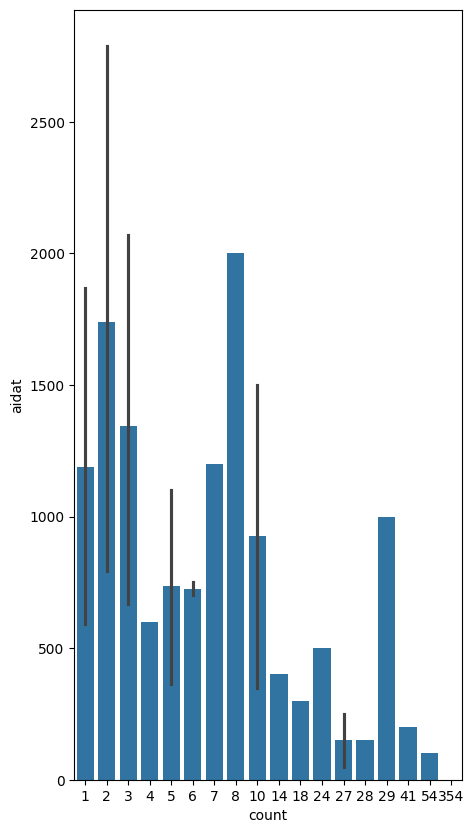

In [24]:
p_id=dfMlb.value_counts('aidat').sort_values(ascending=False).head(50)
plt.figure(figsize=(5,10))
sns.barplot(y=p_id.index,x=p_id)
plt.show()

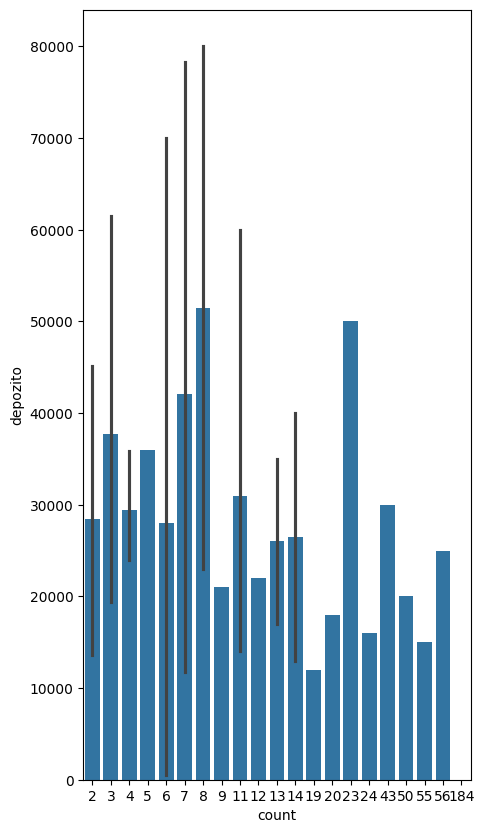

In [25]:
p_id=dfMlb.value_counts('depozito').sort_values(ascending=False).head(50)
plt.figure(figsize=(5,10))
sns.barplot(y=p_id.index,x=p_id)
plt.show()

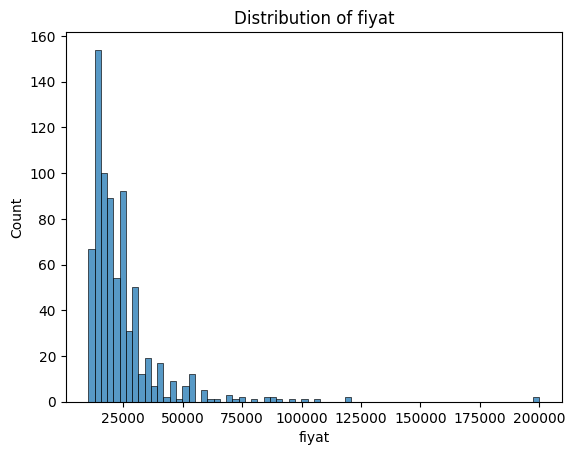

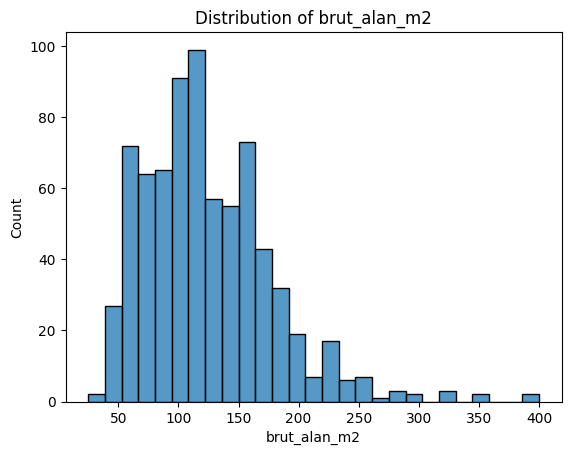

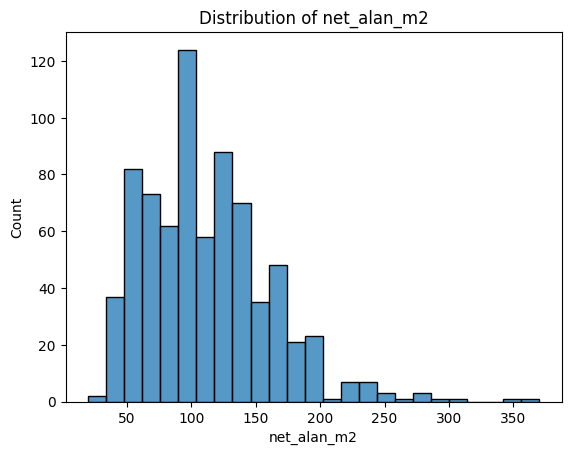

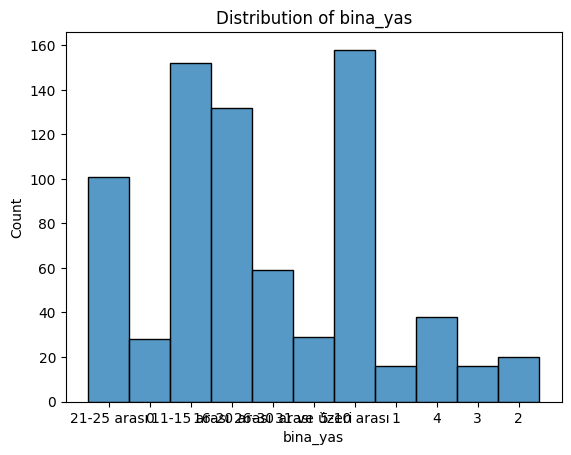

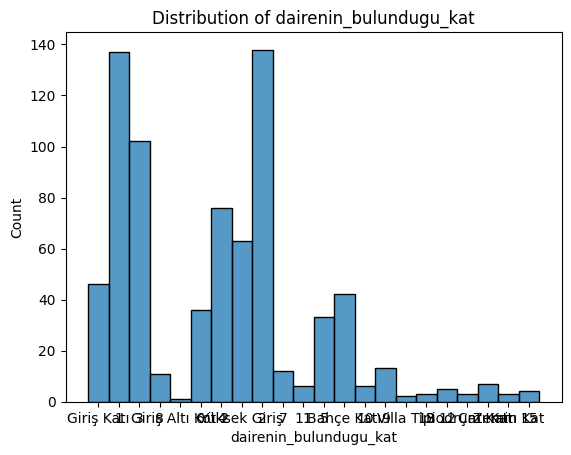

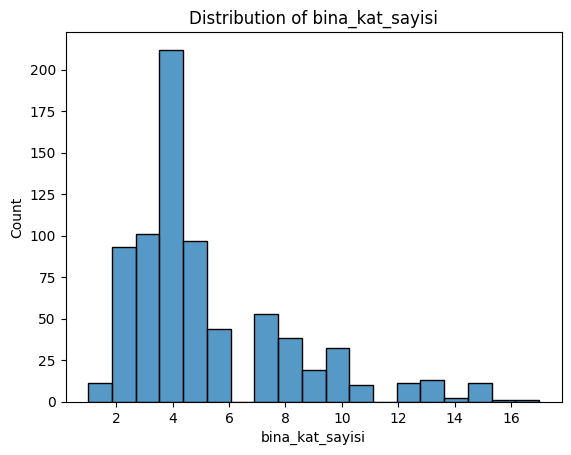

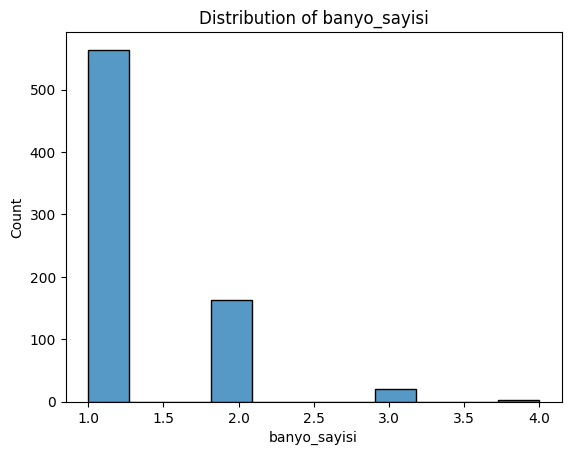

In [26]:
for col in ['fiyat', 'brut_alan_m2', 'net_alan_m2', 'bina_yas', 'dairenin_bulundugu_kat', 'bina_kat_sayisi', 'banyo_sayisi']:
        sns.histplot(dfMlb[col])
        plt.title(f'Distribution of {col}')
        plt.show()

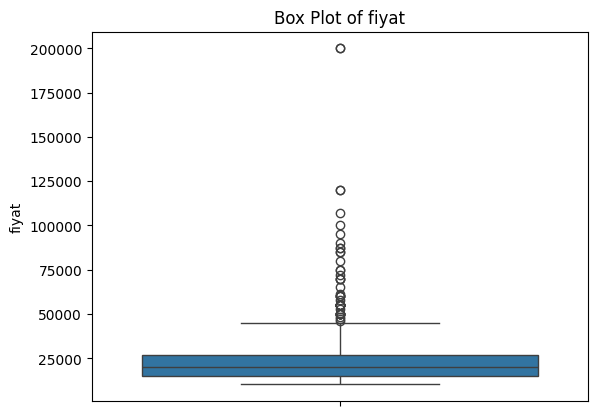

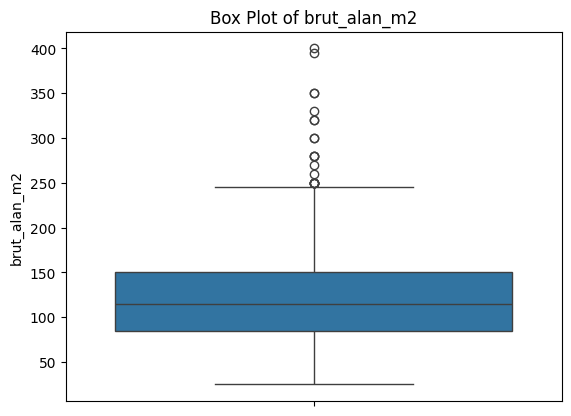

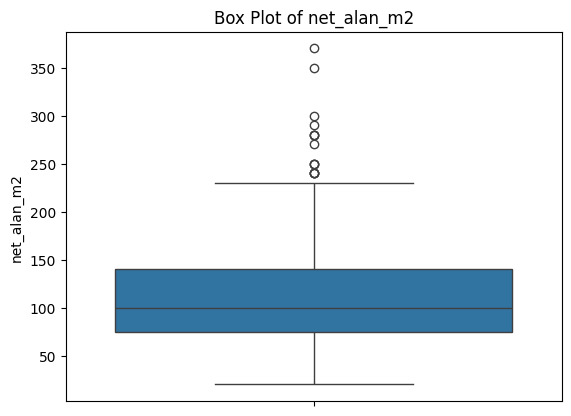

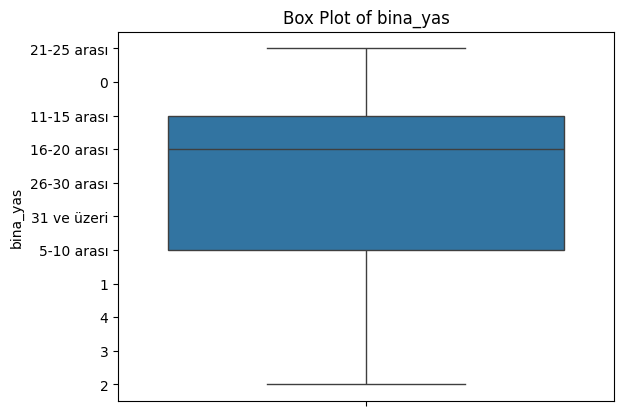

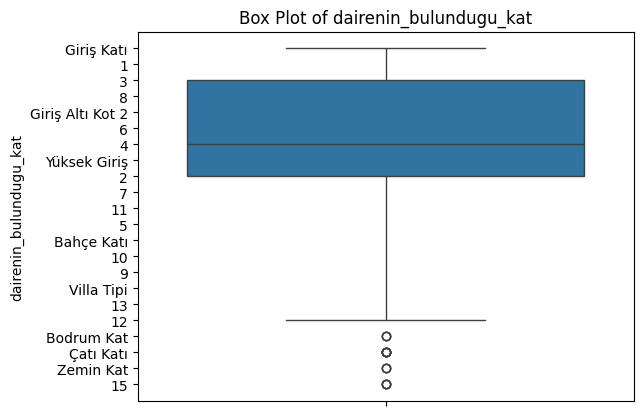

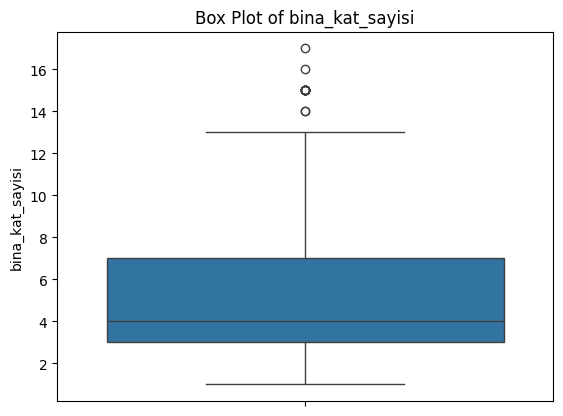

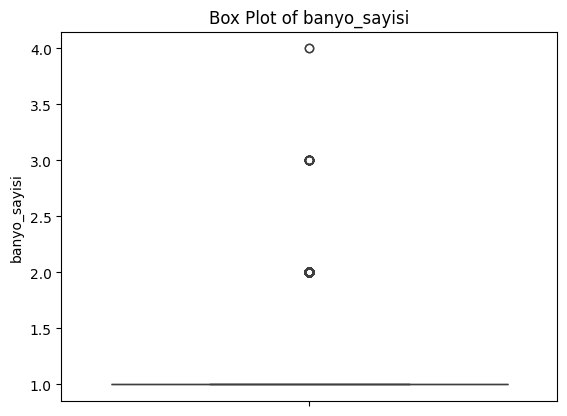

In [27]:
for col in ['fiyat', 'brut_alan_m2', 'net_alan_m2', 'bina_yas', 'dairenin_bulundugu_kat', 'bina_kat_sayisi', 'banyo_sayisi']:
        sns.boxplot(dfMlb[col])
        plt.title(f'Box Plot of {col}')
        plt.show()

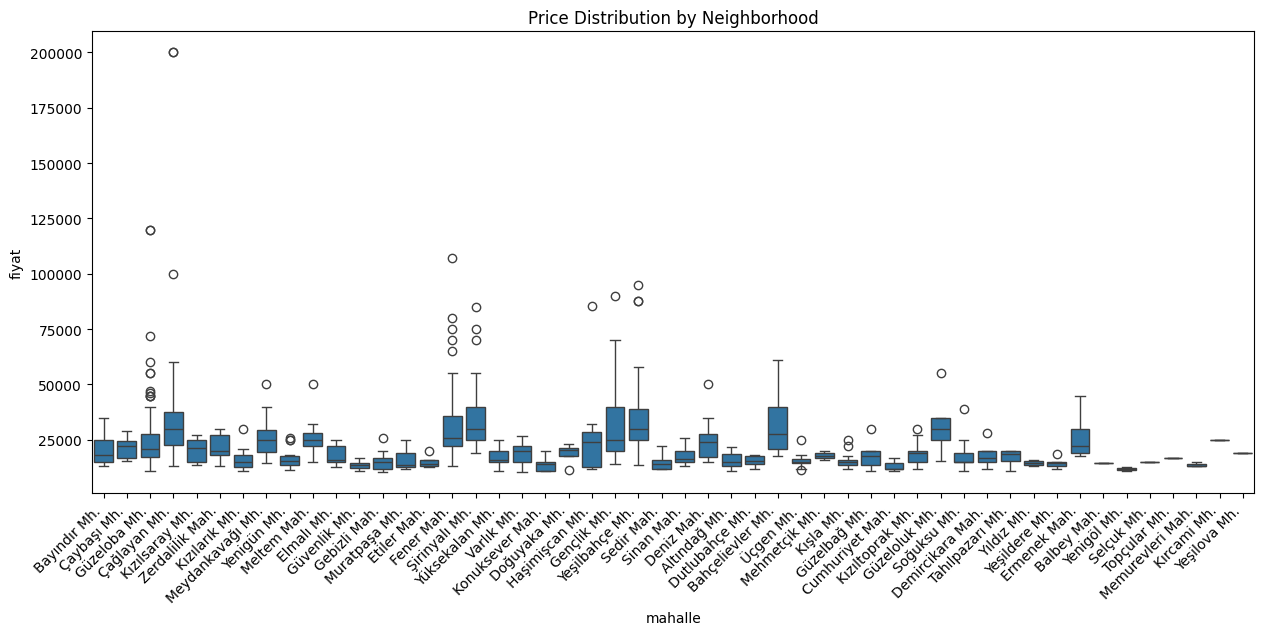

In [28]:
plt.figure(figsize=(15, 6))  # Adjust width (15) as needed
sns.boxplot(x='mahalle', y='fiyat', data=dfMlb)
plt.title('Price Distribution by Neighborhood')
plt.xticks(rotation=45, ha='right')
plt.show()

# Data Preprocessing

In [29]:
# Select target as a series and features as dataframe
y = dfMlb.loc[:,['fiyat']].values.ravel()
X = dfMlb.drop(['fiyat','Unnamed: 0'],axis=1)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, test_size=0.2,random_state=1)

In [30]:
# Select categorical features
cols_cat = [col for col in X.columns if X[col].dtype == 'object' and X[col].nunique()<80]
cols_cat

['mahalle',
 'oda_sayisi',
 'bina_yas',
 'dairenin_bulundugu_kat',
 'isitma_turu',
 'otopark']

In [31]:
# Label encoding on only categorical features

from sklearn.preprocessing import LabelEncoder

Xle_train = X_train.copy()
Xle_test = X_test.copy()
# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in cols_cat:
    Xle_train[col] = label_encoder.fit_transform(X_train[col])
    Xle_test[col] = label_encoder.transform(X_test[col])

In [32]:
# Select numeric features
cols_num = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]
Xnum = X[cols_num]

# Split numeric features into training and test sets
Xnum_train, Xnum_test, y_train, y_test = train_test_split(Xnum,y,train_size=0.8, test_size=0.2,random_state=1)

In [33]:
# Count number of missing values in each column of the training data
Xnum_train.isna().sum()

brut_alan_m2       0
net_alan_m2        0
bina_kat_sayisi    0
banyo_sayisi       0
balkon             0
asansor            0
esya_durumu        0
site_icinde        0
aidat              0
depozito           0
sahibi             0
dtype: int64

# Supervised Learning

In [34]:
y.mean()

24252.45393858478

The mean of the rent prices are 24252.4

# Decision Tree

In [35]:
import sklearn
from sklearn.tree import DecisionTreeRegressor

mdlDtrMlb = DecisionTreeRegressor(random_state=1)

In [36]:
mdlDtrMlb.fit(Xle_train[cols_num + cols_cat], y_train)

DecisionTreeRegressor(random_state=1)

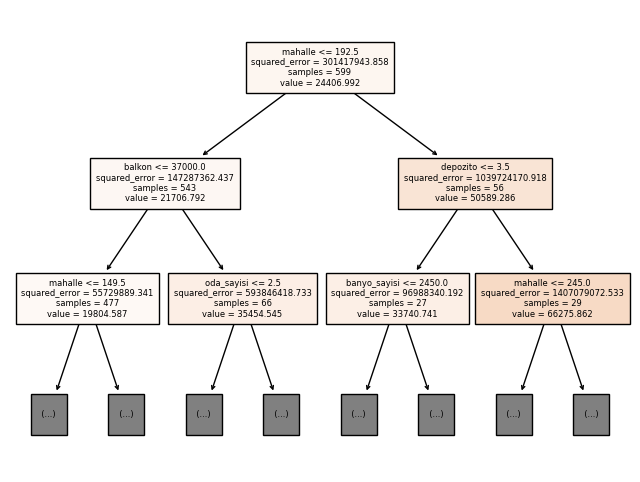

In [37]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6), dpi=100)
plot_tree(mdlDtrMlb, max_depth=2, feature_names=X.columns, fontsize= 6, filled=True)
plt.show()

In [38]:
print('First few houses:')
print(Xle_train[cols_num + cols_cat].head())
print('Price predictions:')
print(mdlDtrMlb.predict(Xle_train[cols_num + cols_cat].head()))

First few houses:
     brut_alan_m2  net_alan_m2  bina_kat_sayisi  banyo_sayisi  balkon  \
489         130.0        105.0              9.0           1.0       1   
713         130.0        120.0              3.0           2.0       1   
719          90.0         80.0              3.0           1.0       1   
539         145.0        130.0              4.0           1.0       1   
195         135.0        120.0              5.0           1.0       0   

     asansor  esya_durumu  site_icinde  aidat  depozito  sahibi  mahalle  \
489        1            1            1    600     65000       0       29   
713        0            0            0   1000     25000       0       17   
719        0            1            0      0         0       0       49   
539        0            1            0    100     18000       0        3   
195        1            0            0      0     15000       1       22   

     oda_sayisi  bina_yas  dairenin_bulundugu_kat  isitma_turu  otopark  
489         

In [39]:
from sklearn.metrics import mean_absolute_error
y_pred = mdlDtrMlb.predict(Xle_test[cols_num + cols_cat])
print('MAE:')
print(mean_absolute_error(y_test,y_pred))

MAE:
6404.7


In [40]:
def get_mae(mx_lf_nds, X_trn, X_tst, y_trn, y_tst):

    mdlDtrMlbDpt = DecisionTreeRegressor(max_leaf_nodes=mx_lf_nds, random_state=1)

    mdlDtrMlbDpt.fit(X_trn,y_trn)

    y_tst_prd = mdlDtrMlbDpt.predict(X_tst)

    mae = mean_absolute_error(y_tst, y_tst_prd)

    return(mae)

In [41]:

for i in [5, 50, 500, 50000]:
  mae = get_mae(i, Xle_train[cols_num + cols_cat], Xle_test[cols_num + cols_cat], y_train, y_test)
  print('Max leaf nodes: ',i, '\t Mean Absolute Error: ',mae)

Max leaf nodes:  5 	 Mean Absolute Error:  8353.513266393198
Max leaf nodes:  50 	 Mean Absolute Error:  6642.587891506123
Max leaf nodes:  500 	 Mean Absolute Error:  6171.7
Max leaf nodes:  50000 	 Mean Absolute Error:  6171.7


## Random Forest

In [42]:
from sklearn.ensemble import RandomForestRegressor

# Function for building and scoring Random Forest models
def get_random_forest_mae(X_trn, X_tst, y_trn, y_tst):
    mdlRfsMlb = RandomForestRegressor(random_state=1)
    mdlRfsMlb.fit(X_trn, y_trn)
    y_tst_prd = mdlRfsMlb.predict(X_tst)
    mae = mean_absolute_error(y_tst, y_tst_prd)
    return (mae)

In [43]:
# Encode and Build/Score using all  columns

mae = get_random_forest_mae(Xle_train[cols_num + cols_cat], Xle_test[cols_num + cols_cat], y_train, y_test)
print("MAE from all  columns:")
print(mae)

MAE from all  columns:
4382.049933333334


## Gradient Boosted Tree

In [44]:
from xgboost import XGBRegressor

#Build and score default Gradient Boosting Model
mdlXgbMlb = XGBRegressor()
mdlXgbMlb.fit(Xle_train[cols_num + cols_cat], y_train)
y_test_pred = mdlXgbMlb.predict(Xle_test[cols_num + cols_cat])
mae = mean_absolute_error(y_test_pred, y_test)

print("MAE from default XGBoost model:")
print(mae)

MAE from default XGBoost model:
4381.1657421875


In [45]:
#Build and score a tuned Gradient Boosting Model
mdlXgbMlb = XGBRegressor(n_estimators=5000, learning_rate=0.01, max_depth=5)
mdlXgbMlb.fit(Xle_train[cols_num + cols_cat], y_train)
y_test_pred = mdlXgbMlb.predict(Xle_test[cols_num + cols_cat])
mae = mean_absolute_error(y_test_pred, y_test)

print("MAE from tuned XGBoost model:")
print(mae)

MAE from tuned XGBoost model:
4262.935533854166


# CATBoost

In [47]:
!pip install catboost==1.2.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.7 MB/s eta 0:00:00


In [48]:
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV

In [49]:
model = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=6, loss_function='RMSE')

param_grid = {
    'iterations': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5]
}


In [50]:
# Assuming 'X' is your feature data and 'y' is your target variable
model.fit(Xle_train[cols_num + cols_cat], y_train)

0:	learn: 16780.8417624	total: 53.7ms	remaining: 5.31s
1:	learn: 16284.6720976	total: 54.8ms	remaining: 2.68s
2:	learn: 15852.1102352	total: 58.4ms	remaining: 1.89s
3:	learn: 15300.1752654	total: 59.9ms	remaining: 1.44s
4:	learn: 14784.7705207	total: 62.2ms	remaining: 1.18s
5:	learn: 14454.3615418	total: 64.3ms	remaining: 1.01s
6:	learn: 14121.7625092	total: 66.4ms	remaining: 882ms
7:	learn: 13724.1831354	total: 68.7ms	remaining: 790ms
8:	learn: 13374.5596879	total: 70.8ms	remaining: 716ms
9:	learn: 13025.7524072	total: 73ms	remaining: 657ms
10:	learn: 12666.5583668	total: 75.3ms	remaining: 610ms
11:	learn: 12467.6610462	total: 78.2ms	remaining: 573ms
12:	learn: 12184.3962878	total: 80.7ms	remaining: 540ms
13:	learn: 11969.4571023	total: 82.5ms	remaining: 507ms
14:	learn: 11719.6336719	total: 84.7ms	remaining: 480ms
15:	learn: 11467.4178241	total: 87.4ms	remaining: 459ms
16:	learn: 11236.3436619	total: 89.5ms	remaining: 437ms
17:	learn: 11044.5326883	total: 91.8ms	remaining: 418ms
18:	

In [51]:
# Assuming 'model' is your trained CatBoostRegressor
y_pred = model.predict(Xle_test[cols_num + cols_cat])

In [52]:
from sklearn.metrics import mean_absolute_error as mae # Import the mean_absolute_error function and alias it as 'mae'

mae_value = mae(y_test, y_pred)
print("MAE:", mae_value)

MAE: 4530.882676333596


Hyperparamter Tuning of CATboost

In [53]:
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV

In [54]:
model = CatBoostRegressor()

# Define the hyperparameter grid to search over
param_grid = {
    'iterations': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5]
}

In [55]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')
# cv is the number of cross-validation folds, scoring metric is negative MAE for minimization

In [56]:
grid_search.fit(Xle_train[cols_num + cols_cat], y_train)  # Assuming you have your data prepared

Görüntülenen çıkış son 5000 satıra kısaltıldı.
0:	learn: 17387.0210666	total: 3.96ms	remaining: 789ms
1:	learn: 16905.2459682	total: 5.96ms	remaining: 590ms
2:	learn: 16363.1154663	total: 7.92ms	remaining: 520ms
3:	learn: 15802.4528890	total: 9.95ms	remaining: 487ms
4:	learn: 15295.9327933	total: 12.1ms	remaining: 472ms
5:	learn: 14859.8152125	total: 13.9ms	remaining: 451ms
6:	learn: 14357.9566846	total: 15.8ms	remaining: 434ms
7:	learn: 13945.5079671	total: 17.7ms	remaining: 424ms
8:	learn: 13610.4799007	total: 19.5ms	remaining: 414ms
9:	learn: 13247.5158340	total: 21.5ms	remaining: 408ms
10:	learn: 12984.0328872	total: 23.3ms	remaining: 401ms
11:	learn: 12680.3128469	total: 25.4ms	remaining: 398ms
12:	learn: 12427.0767920	total: 27.5ms	remaining: 395ms
13:	learn: 12204.2185571	total: 29.6ms	remaining: 393ms
14:	learn: 11918.2889782	total: 31.6ms	remaining: 390ms
15:	learn: 11669.6380287	total: 33.4ms	remaining: 385ms
16:	learn: 11391.5534092	total: 38.5ms	remaining: 415ms
17:	learn: 

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x7e686b31ef50>,
             param_grid={'depth': [4, 6, 8], 'iterations': [50, 100, 200],
                         'l2_leaf_reg': [1, 3, 5],
                         'learning_rate': [0.01, 0.1, 0.2]},
             scoring='neg_mean_absolute_error')

In [57]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

Best Parameters: {'depth': 6, 'iterations': 200, 'l2_leaf_reg': 5, 'learning_rate': 0.1}


In [58]:
from sklearn.metrics import mean_absolute_error as mae

y_pred = best_model.predict(Xle_test[cols_num + cols_cat])
mae_value = mae(y_test, y_pred)
print("MAE on Test Set:", mae_value)

MAE on Test Set: 4551.193530292332


# Support Vector Regression

In [59]:
from sklearn.svm import SVR

In [60]:
model = SVR(kernel='linear')  # Choose an appropriate kernel
model.fit(Xle_train[cols_num + cols_cat], y_train)

SVR(kernel='linear')

In [61]:
y_pred = model.predict(Xle_test[cols_num + cols_cat])

In [62]:
mae_value = mae(y_test, y_pred)
print("MAE on Test Set:", mae_value)

MAE on Test Set: 5638.067168425864


# Ridge Regression

In [63]:
from sklearn.linear_model import Ridge

In [64]:
model = Ridge(alpha=1.0)  # Adjust alpha (regularization strength) as needed
model.fit(Xle_train[cols_num + cols_cat], y_train)

Ridge()

In [65]:
y_pred = model.predict(Xle_test[cols_num + cols_cat])

In [66]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 5795.136336654613


# Lasso Regression

In [67]:
from sklearn.linear_model import Lasso

In [68]:
model = Lasso(alpha=1.0)  # Adjust alpha (regularization strength) as needed
model.fit(Xle_train[cols_num + cols_cat], y_train)

Lasso()

In [69]:
y_pred = model.predict(Xle_test[cols_num + cols_cat])

In [70]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 5798.938392178274


In [71]:
from sklearn.model_selection import GridSearchCV

Parameter Optimization of Lasso Regression

In [72]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

In [73]:
grid_search = GridSearchCV(estimator=Lasso(), param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')

In [74]:
grid_search.fit(Xle_train[cols_num + cols_cat], y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.486e+10, tolerance: 1.223e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.086e+10, tolerance: 1.540e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.940e+10, tolerance: 1.597e

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_absolute_error')

In [75]:
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
print("Best Parameters:", best_params)

Best Parameters: {'alpha': 100}


In [76]:
y_pred = best_estimator.predict(Xle_test[cols_num + cols_cat])
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error with Best Estimator:", mae)

Mean Absolute Error with Best Estimator: 5695.060845373487
